 # **Tema 4 Sección 1 Problema 8 (representación gráfica)**
 
> Un estante horizontal AD de longitud $L =  915$ mm, anchura $b = 305$ mm y espesor $t= 22$ mm está  soportado por dos apoyos 
 situados en las posiciones B y C. Los apoyos son  ajustables y pueden colocarse simétricamente en  cualquier posición entre los extremos del estante. Una  carga uniforme de intensidad $q$, que incluye el peso del  estante, actúa sobre éste.  

- a) Determine el valor admisible máximo de la  carga $q$ si al tensión de flexión admisible en el  estante es $\sigma_{adm} =7.5 MPa$ y la posición de los apoyos se ajusta de forma que el estante soporte la máxima carga.
 


Para una tensión máxima admisible de  7500000.0 Pa,
el momento flector máximo admisible es  184.52499999999998 Nm
El resultado del problema es:
q =  10.0 N/m
a =  0.18950270478569103 m


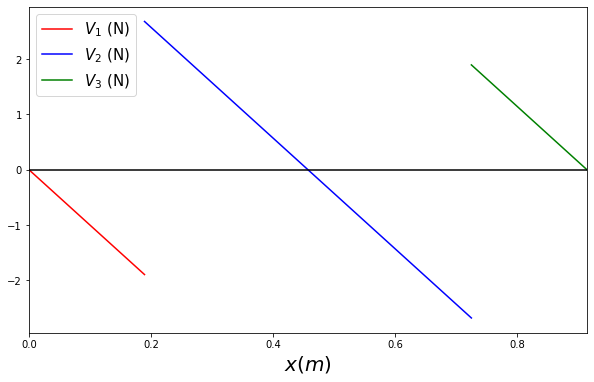

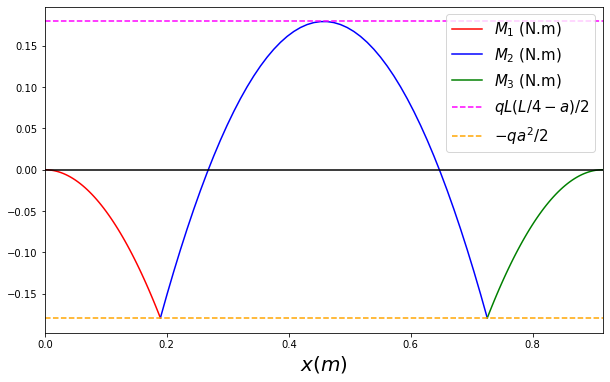

In [4]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

# Datos del problema
L = 915.0e-3       # metros
b = 305.0e-3       # metros
t = 22.0e-3        # metros
sigma_mx_adm=7.5e6 # Pa

'''
La primera parte del problema 8 sirve para demostrar que
la tensión tiene que ser sigma=(ymx*Mmx)/Iz= 6*Mmx/(b*t**2) ,
y por lo tanto, el momento flector máximo será: Mmx=b*(t**2)*sigma_mx_adm/6
Para poder hacer los cálculos lo escribimos como sigue:
'''
Mmx=b*(t**2)*sigma_mx_adm/6 # Ecuación 1

print("Para una tensión máxima admisible de ",sigma_mx_adm,"Pa,")
print("el momento flector máximo admisible es ",Mmx,"Nm")

'''
Para resolver el problema tenemos que calcular {V,M}. 
{V,M} dependen de la carga q, de la longitud del tablón L y la distancia que hay desde los apoyos
hasta los extremos del estante. A esa distancia la llamamos a.
La solución del problema pasa por igualar el valor máximo de M que se da en el 
centro del tablón (tramo 2) y el valor de M que ocurre en los apoyos. Eso sí, 
tomando el valor absoluto.

La idea que permite resolver el problema es que la carga está mejor 
repartida cuando el momento flector está más repartido.
Eso ocurre cuando M(L/2)=M(a) (o M(L/2)=M(L-a))

Con este código podemos 
demostrar gráficamente que  M(L/2)=M(a) (y M(L/2)=M(L-a)) se cumple para los valores de q y a,
resultados del problema.

Podemos jugar con otros valores para ver en que situaciones no se cumple, y entender cómo afecta la posición
de los apoyos en la distribución de la carga.

El resultado del problema en términos de q y a, es: 
'''
q= 10276.0 # N/m
q=10.0 #
a=(math.sqrt(2.0)-1.0)*L/2.0

print("El resultado del problema es:")
print("q = ", q, "N/m")
print("a = ",a,"m")
# Esfuerzos {V,M} por tramos en función de q

# Tramo (1)
x=symbols('x')  # x = distancia al origen               
def V1(x):        
    return  -q*x
def M1(x):        
    return  -q*x**2/2.0

# Tramo (2)
def V2(x):        
    return  -q*x+q*L/2.0
def M2(x):        
    return  -q*x**2/2.0 +q*L*x/2.0-q*a*L/2.0

# Tramo (3)
def V3(x):        
    return  -q*(x-L)
def M3(x):        
    return  -q*(x-L)**2/2.0
#-------------------------------------------------------------------------------------#

# Representación gráfica
Xmin= 0.0 ; Xmax=L; nopto=50 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
x1=a
x2=L-a
xab=np.linspace(0.0,x1,nopto)
xbc=np.linspace(x1,x2,nopto)
xcd=np.linspace(x2,L,nopto)
xx=np.linspace(0.0,L,nopto)

fab=np.zeros((nopto,1))
fbc=np.zeros((nopto,1))
fcd=np.zeros((nopto,1))
cero=np.zeros((nopto,1))
fmx=np.zeros((nopto,1))
fmn=np.zeros((nopto,1))

# Esfuerzo cortante
for i in range(0,nopto):              
    fab[i]=V1(x).subs(x,xab[[i]]) 
    fbc[i]=V2(x).subs(x,xbc[[i]]) 
    fcd[i]=V3(x).subs(x,xcd[[i]]) 
    cero[i]=0.0                             
      
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xab,fab, color="red", label="$V_{1}$ (N)")
ax.plot(xbc,fbc, color="blue", label="$V_{2}$ (N)") 
ax.plot(xcd,fcd, color="green", label="$V_{3}$ (N)")
ax.plot(xx,cero, color="black")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,L)
ax.legend(fontsize=15) # Hace que se pinte la leyenda

# Momento flector
for i in range(0,nopto):              
    fab[i]=M1(x).subs(x,xab[[i]]) 
    fbc[i]=M2(x).subs(x,xbc[[i]]) 
    fcd[i]=M3(x).subs(x,xcd[[i]]) 
    cero[i]=0.0   
    fmx[i]=q*L*(L/4-a)/2
    fmn[i]=-q*a**2/2
      
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xab,fab, color="red", label="$M_{1}$ (N.m)")
ax.plot(xbc,fbc, color="blue", label="$M_{2}$ (N.m)") 
ax.plot(xcd,fcd, color="green", label="$M_{3}$ (N.m)")
ax.plot(xx,cero, color="black")
ax.plot(xx,fmx, color="magenta",linestyle='--' ,label="$qL(L/4-a)/2$")
ax.plot(xx,fmn, color="orange",linestyle='--' ,label="$-q a^2/2$")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,L)
ax.legend(fontsize=15) # Hace que se pinte la leyenda